In [9]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/USArrests.csv')
X = data.drop(columns=['Unnamed: 0'])

In [5]:
X = pd.DataFrame(scale(X), index=X.index, columns=X.columns)
X

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [21]:
model = KMeans(n_clusters=4)
y_means = model.fit_predict(X)
print(y_means)

labels = model.labels_

[3 0 0 3 0 0 1 1 0 3 1 2 0 1 2 1 2 3 2 0 1 0 2 3 1 2 2 0 2 1 0 0 3 2 1 1 1
 1 1 3 2 3 0 1 2 1 1 2 2 1]


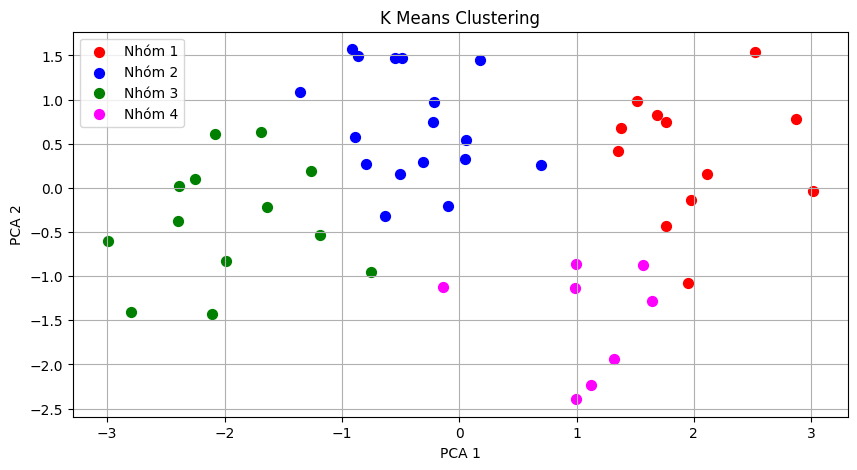

In [22]:
pca = PCA(2)
reduced_data = pca.fit_transform(X)

# Vẽ biểu đồ scatter với nhãn của KMeans
plt.figure(figsize=(10, 5))
colors = ['red', 'blue', 'green', 'magenta']
for i in range(4):
    points = reduced_data[labels == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Nhóm {i+1}', s=50)

# Đặt tiêu đề và nhãn
plt.title("K Means Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()